1999~2005的预测值： [2.67       3.11608066 3.25719252 3.40469464 3.5588764  3.72004029
 3.8885025 ]

-------------------------------
 相对误差 [ 0.         14.42307692 17.84615385 21.70087977 25.         28.22580645]


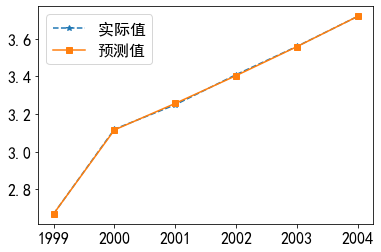

In [1]:
#15.1

import numpy as np        #GM(1,1)前面的1是表示一阶微分方程，后面的1表示一个未知数
import sympy as sp        #该GM（1，1）模型只能描述单调变化过程
from matplotlib.pyplot import plot,show,rc,legend,xticks     #导入数据库
rc('font',size=16)
rc('font',family='SimHei')      #使plot画的图中可以显示中文
x0=np.array([2.67,3.12,3.25,3.41,3.56,3.72])     #导入数据
n=len(x0)
jibi=x0[:-1]/x0[1:]      #求级比
bd1=[jibi.min(),jibi.max()]       #求级比范围
bd2=[np.exp(-2/(n+1)),np.exp(2/(n+1))]      #q求级比范围的容许范围
x1=np.cumsum(x0)      #求累加序列
z=(x1[:-1]+x1[1:])/2.0
B=np.vstack([-z,np.ones(n-1)]).T
u=np.linalg.pinv(B)@x0[1:]     #最小二乘法拟合参数
sp.var('t')
sp.var('x',cls=sp.Function)      #定义符号变量和函数
eq=x(t).diff(t)+u[0]*x(t)-u[1]     #定义符号微分方程
xt=sp.dsolve(eq,ics={x(0):x0[0]})      #求解符号微分方程
xt=xt.args[1]     #提取方程中的符号解
xt=sp.lambdify(t,xt,'numpy')      #转换成匿名函数
t=np.arange(n+1)
xt1=xt(t)     #求模型的预测值
x0_pred=np.hstack([x0[0],np.diff(xt1)])     #还原数据
x2002=x0_pred[-1]      #提取2002年的预测值
cha=x0-x0_pred[:1]
delta=np.abs(cha/x0)*100
print('1999~2005的预测值：',x0_pred)
print('\n-------------------------------\n','相对误差',delta)
t0=np.arange(1999,2005)
plot(t0,x0,"*--")      #画出原来的数据图
plot(t0,x0_pred[:-1],'s-')      #画出由灰色预测模型下预测的数据图
legend(('实际值','预测值'))    #显示两幅图的图标
xticks(np.arange(1999,2005))
show()

********** 级比检验
[0.73676681 1.46848739 0.7020649  0.98083183 1.78387097 0.55258467
 1.87       0.47468354 1.17037037 1.32939439 1.29445507 0.54479167
 0.98025868 1.84489796 0.79565326 0.6777853 ]
[0.47468354430379744, 1.87] [0.8948393168143698, 1.1175190687418637]
********** 建模
[ 691.6  1161.6  1623.2  2170.9  2602.4  3037.9  3468.4  3934.4  4520.4
 4993.5  5353.5  5798.4  6380.2  6833.25 7192.65 7688.1 ]
[[-6.91600e+02  1.00000e+00]
 [-1.16160e+03  1.00000e+00]
 [-1.62320e+03  1.00000e+00]
 [-2.17090e+03  1.00000e+00]
 [-2.60240e+03  1.00000e+00]
 [-3.03790e+03  1.00000e+00]
 [-3.46840e+03  1.00000e+00]
 [-3.93440e+03  1.00000e+00]
 [-4.52040e+03  1.00000e+00]
 [-4.99350e+03  1.00000e+00]
 [-5.35350e+03  1.00000e+00]
 [-5.79840e+03  1.00000e+00]
 [-6.38020e+03  1.00000e+00]
 [-6.83325e+03  1.00000e+00]
 [-7.19265e+03  1.00000e+00]
 [-7.68810e+03  1.00000e+00]]
[1.83087632e-03 4.80930834e+02]
********** 解方程
Eq(x(t), 262677.947893454 - 262265.947893454*exp(-0.00183087631680452*t))
*****

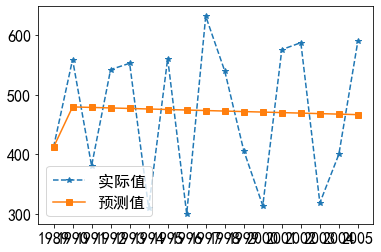

'\nGM(2,1)\nimport numpy as np\nimport sympy as sp\nimport matplotlib.pyplot as plt\nx0 = np.array([412.0,559.2,380.8,542.4,553.0,310.0,561.0,300.0,\n            632.0,540.0,406.2,313.8,576.0,587.6,318.5,400.3,590.6])\nn=len(x0)\nlamda=x0[:-1]/x0[1:]  #计算级比\nrang=[lamda.min(), lamda.max()]  #计算级比的范围\ntheta=[np.exp(-2/(n+1)),np.exp(2/(n+1))] #计算级比容许范围\nprint(rang)\nprint(theta)\nx1=np.cumsum(x0)  #累加运算\nz=0.5*(x1[1:]+x1[:-1])\nB=np.vstack([-x0[1:],-z,np.ones(n-1)]).T\nu=np.linalg.pinv(B)@np.diff(x0)  #最小二乘法拟合参数\nprint("参数u：",u)\nsp.var(\'t\');\nsp.var(\'x\',cls=sp.Function)  #定义符号变量和函数\neq = x(t).diff(t,2)+u[0]*x(t).diff(t)+u[1]*x(t)-u[2]\ns=sp.dsolve(eq,ics={x(0):x0[0],x(5):x1[-1]})  #求微分方程符号解\nxt=s.args[1]  #提取解的符号表达式\nprint(\'xt=\',xt)\nfxt=sp.lambdify(t,xt,\'numpy\')  #转换为匿名函数\nyuce1=fxt(np.arange(n))  #求预测值\nprint(yuce1)\nyuce=np.hstack([x0[0],np.diff(yuce1)])  #还原数据\nplt.plot(x0)\nplt.plot(yuce)\nepsilon=x0-yuce[:n]  #计算已知数据预测的残差\ndelta=abs(epsilon/x0)  #计算相对误差\nprint(\'相对误差：\',np

In [22]:
#15.2

'''
GM(1.1)的预测效果非常不好,误差较大
GM(2,1)的预测效果极差，误差非常大
知乎上有朋友做二次指数平滑，应该比较合适
'''
import numpy as np
import sympy as sp
from matplotlib.pyplot import plot,show,rc,legend,xticks
rc('font',size=16); rc('font',family='SimHei')
x0=np.array([412.0,559.2,380.8,542.4,553.0,310.0,561.0,300.0,
            632.0,540.0,406.2,313.8,576.0,587.6,318.5,400.3,590.6])

print('*'*10,'级比检验')
n=len(x0); jibi=x0[:-1]/x0[1:]  #求级比
print(jibi)
bd1=[jibi.min(),jibi.max()]    #求级比范围
bd2=[np.exp(-2/(n+1)),np.exp(2/(n+1))]   #q求级比的容许范围
print(bd1,bd2)

print('*'*10,'建模')
x1=np.cumsum(x0)  #求累加序列
z=(x1[:-1]+x1[1:])/2.0#累加序列的均值生成序列
print(z)
B=np.vstack([-z,np.ones(n-1)]).T
print(B)#获得最终的B值
u=np.linalg.pinv(B)@x0[1:] #最小二乘法拟合参数。求的最小值u的估计值（即使Y-Bu=0）
print(u)

print('*'*10,'解方程')
sp.var('t'); sp.var('x',cls=sp.Function)  #定义符号变量和函数，x(t)
eq=x(t).diff(t)+u[0]*x(t)-u[1]  #定义符号微分方程
xt=sp.dsolve(eq,ics={x(0):x0[0]})  #求解符号微分方程
print(xt)
xt=xt.args[1]  #提取方程中的符号解
xt=sp.lambdify(t,xt,'numpy')  #转换为匿名函数

print('*'*10,'求预测值')
t=np.arange(n+1)
xt1=xt(t)  #求模型的预测值
x0_pred=np.hstack([x0[0],np.diff(xt1)]) #还原数据（预测数据）
x2007=x0_pred[-1]  #提取2007年预测数据
cha = x0-x0_pred[:-1]; delta = np.abs(cha/x0)*100
print('1989~2006的预测值：',x0_pred)
print('\n-------------------\n','相对误差',delta)
t0=np.arange(1989,2006); plot(t0,x0,'*--')
plot(t0,x0_pred[:-1],'s-'); legend(('实际值','预测值'));
xticks(np.arange(1989,2006))
show()
'''
GM(2,1)
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
x0 = np.array([412.0,559.2,380.8,542.4,553.0,310.0,561.0,300.0,
            632.0,540.0,406.2,313.8,576.0,587.6,318.5,400.3,590.6])
n=len(x0)
lamda=x0[:-1]/x0[1:]  #计算级比
rang=[lamda.min(), lamda.max()]  #计算级比的范围
theta=[np.exp(-2/(n+1)),np.exp(2/(n+1))] #计算级比容许范围
print(rang)
print(theta)
x1=np.cumsum(x0)  #累加运算
z=0.5*(x1[1:]+x1[:-1])
B=np.vstack([-x0[1:],-z,np.ones(n-1)]).T
u=np.linalg.pinv(B)@np.diff(x0)  #最小二乘法拟合参数
print("参数u：",u)
sp.var('t');
sp.var('x',cls=sp.Function)  #定义符号变量和函数
eq = x(t).diff(t,2)+u[0]*x(t).diff(t)+u[1]*x(t)-u[2]
s=sp.dsolve(eq,ics={x(0):x0[0],x(5):x1[-1]})  #求微分方程符号解
xt=s.args[1]  #提取解的符号表达式
print('xt=',xt)
fxt=sp.lambdify(t,xt,'numpy')  #转换为匿名函数
yuce1=fxt(np.arange(n))  #求预测值
print(yuce1)
yuce=np.hstack([x0[0],np.diff(yuce1)])  #还原数据
plt.plot(x0)
plt.plot(yuce)
epsilon=x0-yuce[:n]  #计算已知数据预测的残差
delta=abs(epsilon/x0)  #计算相对误差
print('相对误差：',np.round(delta*100,2))  #显示相对误差
'''

In [3]:
#15.3

#灰色G(1,M)模型
import numpy as np
from scipy.integrate import odeint
#导入已知数据
x10=np.array([269751,271016,270202,272770,277314,282783])
x20=np.array([17675,250172,265415,239894,255345,260253])
x30=np.array([566.9,756.0,761.3,681.0,590.0,1236.0])
x40=np.array([812.0,1136.0,1108.0,1008.0,1177.0,1251])
#求累加序列
x11=np.cumsum(x10);x21=np.cumsum(x20)
x31=np.cumsum(x30);x41=np.cumsum(x40)
z1=(x11[:-1]+x11[1:])/2;z2=(x21[:-1]+x21[1:])/2
z3=(x31[:-1]+x31[1:])/2;z4=(x41[:-1]+x41[1:])/2
#最小二乘法拟合参数
B1=np.c_[z1,np.ones((5,1))];u1=np.linalg.pinv(B1).dot(x10[1:]);print(u1)
B2=np.c_[z1,z2];u2=np.linalg.pinv(B2).dot(x20[1:]);print(u2)
B3=np.c_[z3,np.ones((5,1))];u3=np.linalg.pinv(B3).dot(x30[1:]);print(u3)
B4=np.c_[z1,z3,z4];u4=np.linalg.pinv(B4).dot(x40[1:]);print(u4)
def Pfun(x,t):
    x1,x2,x3,x4=x
    return np.array([u1[0]*x1+u1[1],u2[0]*x1+u2[1]*x2,
                     u3[0]*x3+u3[1],u4[0]*x1+u4[1]*x3+u4[2]*x4])
t=np.arange(0,7)      #创建合适数量的数组
X0=np.array([269751,17675,566.9,812.0])    #导入妹子数据的开始数据
s1=odeint(Pfun,X0,t)
s2=np.diff(s1,axis=0)
xh=np.vstack([X0,s2])
pre=xh[-1,:]
print("2007年人口预测值",pre[0])
print("2007年粮食消费预测值：",pre[1])
print("2007年畜牧产值：",pre[2])
print("2007年粮食亩产：",pre[3])




[1.12101015e-02 2.64159957e+05]
[ 1.02314919 -1.10333706]
[1.15175675e-01 5.25983987e+02]
[ 0.01425587  1.89860155 -4.73846713]
2007年人口预测值 284177.1901956999
2007年粮食消费预测值： 260900.6772277914
2007年畜牧产值： 1114.6587848855643
2007年粮食亩产： 1288.9623372343722


[2.87399999999995, 6.04939088432833, 9.36536154002487, 12.8388326140183, 16.5579999999997] 
----------
 [2.87399999999995 3.17539088432839 3.31597065569653 3.47347107399341
 3.71916738598140] 
---------------
 [5.50670620214078e-14 0.102609115671610 0.0210293443034657
 -0.0834710739934139 -0.0401673859814040] 
-----------------
 [1.91604251988197e-14 0.0313023537741337 0.00630187123268376
 0.0246227356912725 0.0109180173909769]


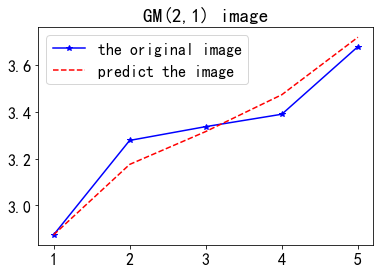

In [2]:
#15.4

import numpy as np
from sympy import Function,diff,dsolve,symbols,solve,exp
import matplotlib.pyplot as plt
x0=np.array([2.874,3.278,3.337,3.390,3.679])     #导入数据
n=len(x0)
x1=np.cumsum(x0)         #计算第一次累减序列
ax0=np.diff(x0)          #计算一次累减序列
z=0.5*(x1[1:]+x1[:-1])       #计算均值生成序列
B=np.c_[-x0[1:],-z,np.ones((n-1,1))]
u=np.linalg.pinv(B).dot(ax0)
p=np.r_[1,u[:-1]]        #构造特征多项式
r=np.roots(p)       #就特征根
xts=u[2]/u[1]        #常微分方程的特解
c1,c2,t=symbols('c1,c2,t')
eq1=c1+c2+xts-2.874    #这里的2.874是输入数据的首个数据
eq2=c1*np.exp(4*r[0])+c2*np.exp(4*r[1])+xts-16.558      #这里面的数字4是导入数据减一，而后面的16.558是所有数据之和
c=solve([eq1,eq2],[c1,c2])
s=c[c1]*exp(r[0]*t)+c[c2]*exp(r[1]*t)+xts         #微分方程的符号解
xt1=[]
for i in range(5):xt1.append(s.subs({t:i}))
xh0=np.r_[xt1[0],np.diff(xt1)]
cha=x0-xh0       #计算残差
delta=np.abs(cha)/x0      #计算相对误差
print(xt1,'\n----------\n',xh0,'\n---------------\n',
      cha,'\n-----------------\n',delta)
#画出该模型的图像
hgq=np.arange(1,6,1)
plt.plot(hgq,x0,'b*-',label='the original image');plt.legend()
plt.plot(hgq,xh0,'r--',label='predict the image');plt.legend()
plt.title("GM(2,1) image")
plt.show()